In [114]:
from googleapiclient.discovery import build
from dotenv import load
import os
import pandas as pd
import seaborn as sns

In [115]:
load()

True

In [116]:
api_key = os.getenv("API_KEY")
#channel_id = 'UCnz-ZXXER4jOvuED5trXfEA'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [117]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [118]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [119]:
channel_data = pd.DataFrame(channel_statistics)

In [120]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Tina Huang,464000,19466179,118,UU2UXDak6o7rBm23k3Vv5dww
1,Ken Jee,237000,7647975,262,UUiT9RITQ9PW6BhXK0y2jaeg
2,techTFQ,172000,8251732,84,UUnz-ZXXER4jOvuED5trXfEA
3,Luke Barousse,320000,14479188,122,UULLw7jmFsvfIVaUFsLs8mlQ
4,Alex The Analyst,397000,15381988,195,UU7cs8q-gJRlGwj4A8OmCmXg


In [121]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

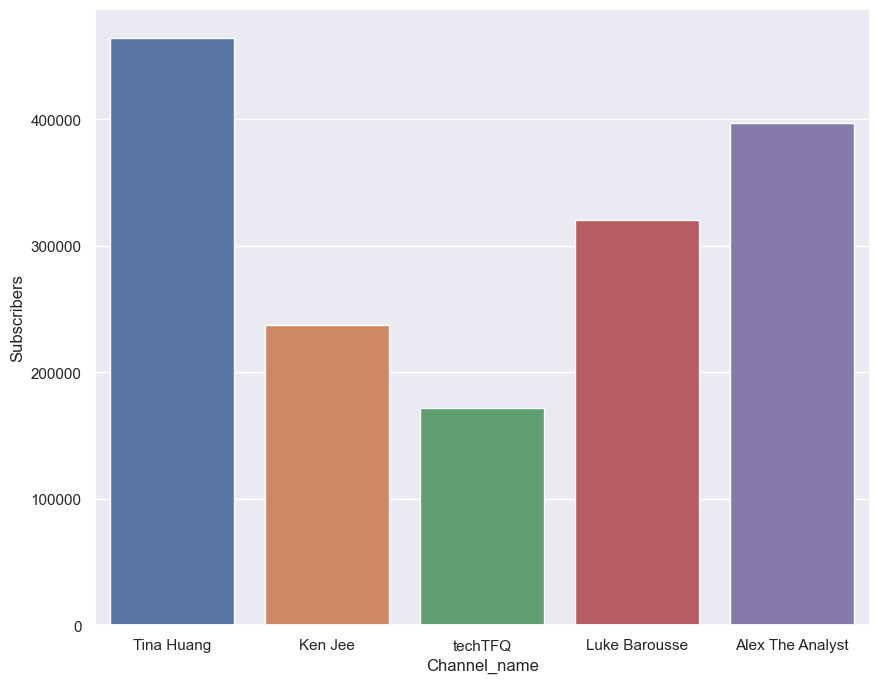

In [122]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

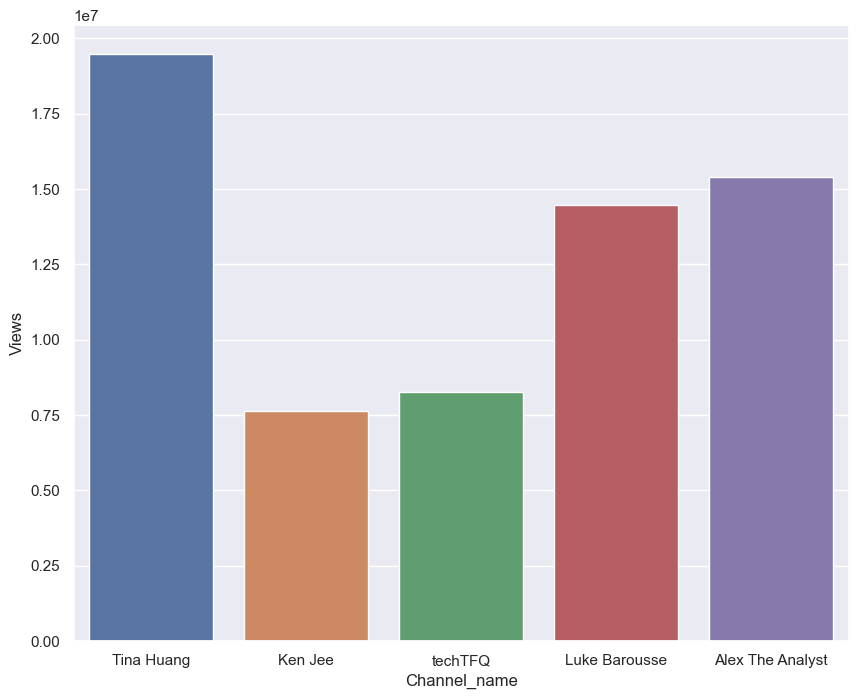

In [123]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

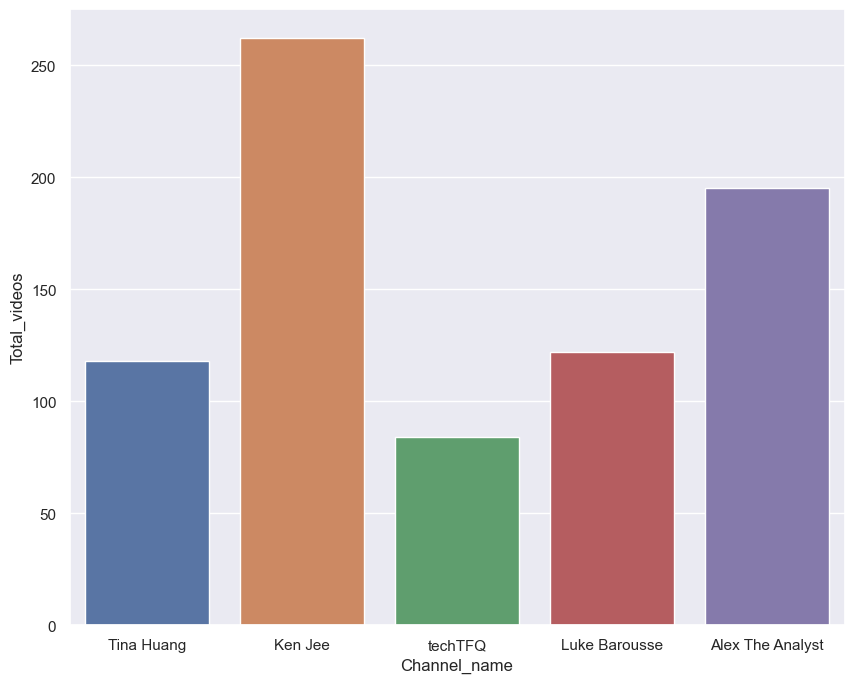

In [124]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

## Function to get video ids

In [125]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Tina Huang,464000,19466179,118,UU2UXDak6o7rBm23k3Vv5dww
1,Ken Jee,237000,7647975,262,UUiT9RITQ9PW6BhXK0y2jaeg
2,techTFQ,172000,8251732,84,UUnz-ZXXER4jOvuED5trXfEA
3,Luke Barousse,320000,14479188,122,UULLw7jmFsvfIVaUFsLs8mlQ
4,Alex The Analyst,397000,15381988,195,UU7cs8q-gJRlGwj4A8OmCmXg


In [126]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [127]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [128]:
video_ids = get_video_ids(youtube, playlist_id)

In [129]:
video_ids

['UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CMYom00',
 'KEeUR8UDy-s',
 '0jTtHYie3CU',
 '2RWwN5ZT4tA',
 'rEWPqw6rMGI',
 'o-wsyxWbPOw',
 'xpIFS6jZbe8',
 '-zbLpoJVBMI',
 'scSc6YSanQ0',
 'FqNpDNmpcEo',
 'vwvdtXMcNzI',
 '2qVWurPFwfc',
 '35g8fCi-kbw',
 'n6MiRgxN5iA',
 'ammCGdzSoag',
 '15c7WD-lKUY',
 'TjGFBQC27ng',
 'qUK5Vk4NvBw',
 'cnqTU6eJwH0',
 'k8YxyrcAXJs',
 'VvnOXDCVm8k',
 '68GGPK3WaqI',
 'S4Lei5mOppc',
 'tG_UW_p0UqE',
 '143WWA

## Function to get video details

In [130]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [131]:
video_details = get_video_details(youtube, video_ids)

In [132]:
video_data = pd.DataFrame(video_details)

In [133]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Why I Quit Data Science... and then crawled ba...,2023-03-01,1801,77,2
1,The Best Place to Look for Data Science Opport...,2023-02-27,1339,61,1
2,Learning On the companies dime #shorts,2023-02-24,1943,90,1
3,The Best Way to Transition to Data Science? #s...,2023-02-21,2597,159,5
4,Avoid this Massive Data Science Learning Mista...,2023-02-17,2957,183,4
...,...,...,...,...,...
257,How to Simulate NBA Games in Python,2018-11-19,16875,382,54
258,Should You Get A Masters in Data Science?,2018-11-14,20332,304,141
259,How I Became A Data Scientist From a Business ...,2018-11-12,6286,192,23
260,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8329,189,17


In [134]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [135]:
top10_videos

,Title,Published_date,Views,Likes,Comments
164,How I Would Learn Data Science (If I Had to St...,2020-05-08,1381094,48820,2001
185,The Best Free Data Science Courses Nobody is T...,2020-03-09,336747,20848,616
44,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,322607,14381,524
191,3 Proven Data Science Projects for Beginners (...,2020-02-17,311930,17295,517
140,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,281629,6494,397
177,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,153666,4242,164
230,The Projects You Should Do To Get A Data Scien...,2019-07-30,146292,5617,252
77,Why You Probably Won't Become a Data Scientist,2021-04-09,132423,3878,487
92,How I Would Learn Data Science in 2021 (What H...,2020-12-19,130721,5973,494
190,How to Set Up Your Data Science Environment (A...,2020-02-21,112858,2245,98


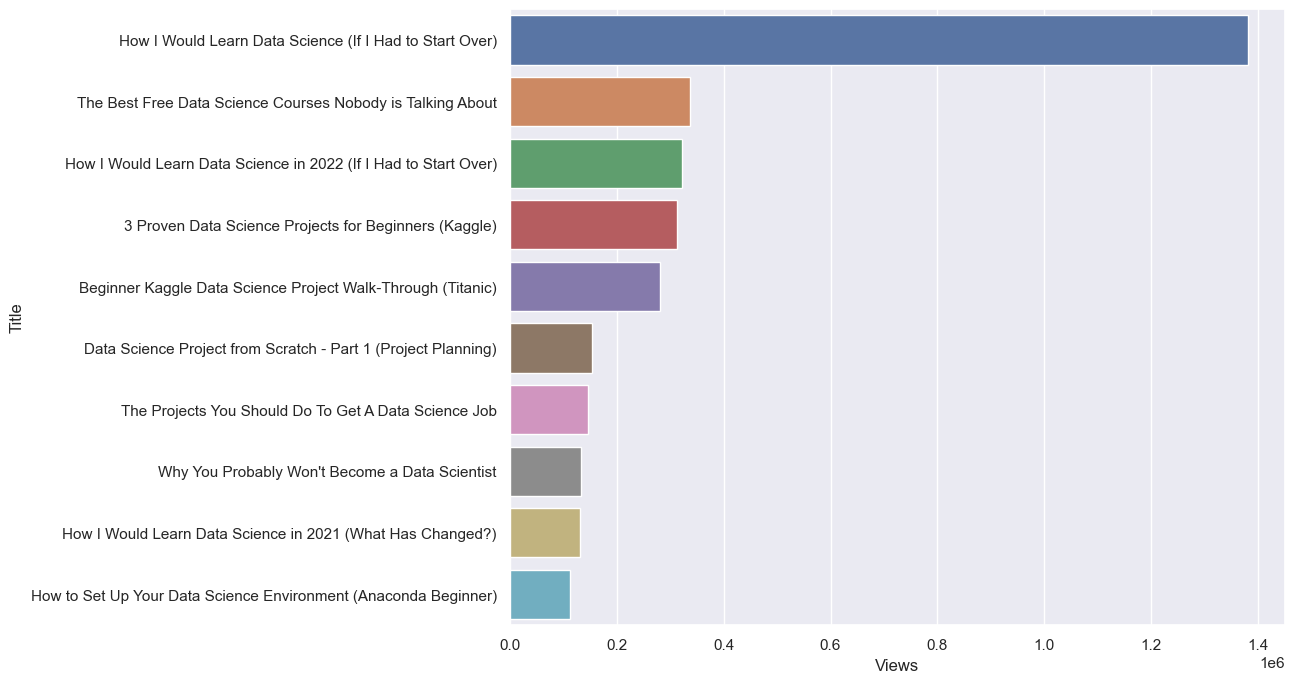

In [136]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [137]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Why I Quit Data Science... and then crawled ba...,2023-03-01,1801,77,2
1,The Best Place to Look for Data Science Opport...,2023-02-27,1339,61,1
2,Learning On the companies dime #shorts,2023-02-24,1943,90,1
3,The Best Way to Transition to Data Science? #s...,2023-02-21,2597,159,5
4,Avoid this Massive Data Science Learning Mista...,2023-02-17,2957,183,4
...,...,...,...,...,...
257,How to Simulate NBA Games in Python,2018-11-19,16875,382,54
258,Should You Get A Masters in Data Science?,2018-11-14,20332,304,141
259,How I Became A Data Scientist From a Business ...,2018-11-12,6286,192,23
260,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8329,189,17


In [138]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [139]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Why I Quit Data Science... and then crawled ba...,2023-03-01,1801,77,2,Mar
1,The Best Place to Look for Data Science Opport...,2023-02-27,1339,61,1,Feb
2,Learning On the companies dime #shorts,2023-02-24,1943,90,1,Feb
3,The Best Way to Transition to Data Science? #s...,2023-02-21,2597,159,5,Feb
4,Avoid this Massive Data Science Learning Mista...,2023-02-17,2957,183,4,Feb
...,...,...,...,...,...,...
257,How to Simulate NBA Games in Python,2018-11-19,16875,382,54,Nov
258,Should You Get A Masters in Data Science?,2018-11-14,20332,304,141,Nov
259,How I Became A Data Scientist From a Business ...,2018-11-12,6286,192,23,Nov
260,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8329,189,17,Jul


In [140]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [141]:
videos_per_month

,Month,size
0,Apr,20
1,Aug,24
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,25
6,Jun,19
7,Mar,23
8,May,21
9,Nov,20


In [142]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [143]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [144]:
videos_per_month = videos_per_month.sort_index()

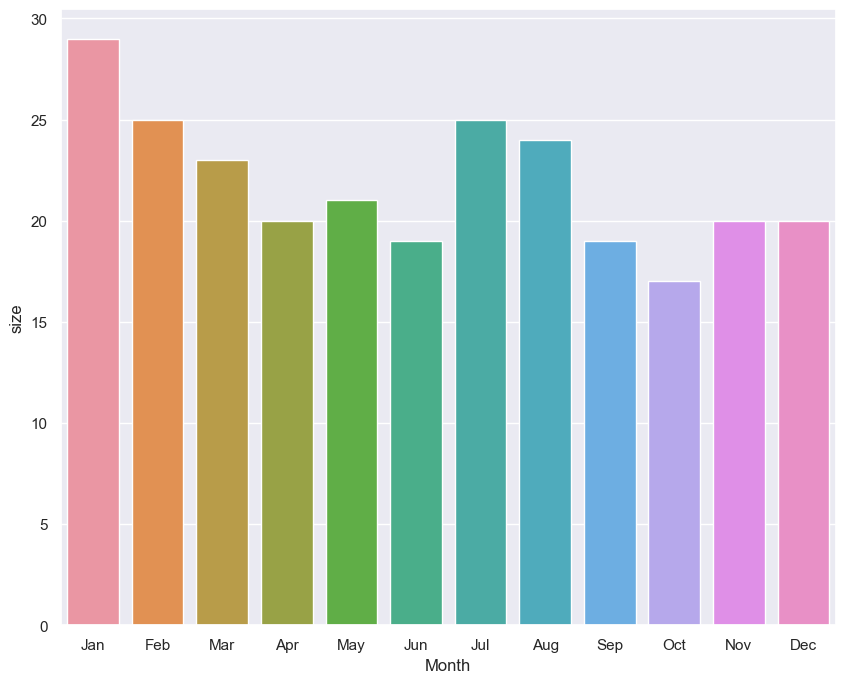

In [145]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)